In [4]:
import pandas as pd
import pytz
import numpy as np
import matplotlib as plt
from datetime import datetime as dt, timedelta, time, date
from tiingo import TiingoClient

"""
client = TiingoClient()
hist = []
hist.append(client.get_ticker_price("AGL",startDate='2022-01-01',endDate='2022-01-31',frequency='1Min'))
hist.append(client.get_ticker_price("AGL",startDate='2022-02-01',endDate='2022-02-28',frequency='1Min'))
hist.append(client.get_ticker_price("AGL",startDate='2022-03-01',endDate='2022-03-31',frequency='1Min'))
hist.append(client.get_ticker_price("AGL",startDate='2022-04-01',endDate='2022-04-30',frequency='1Min'))
hist.append(client.get_ticker_price("AGL",startDate='2022-05-01',endDate='2022-05-31',frequency='1Min'))
hist.append(client.get_ticker_price("AGL",startDate='2022-06-01',endDate='2022-06-30',frequency='1Min'))
hist.append(client.get_ticker_price("AGL",startDate='2022-07-01',endDate='2022-07-31',frequency='1Min'))
hist.append(client.get_ticker_price("AGL",startDate='2022-08-01',endDate='2022-08-31',frequency='1Min'))
hist.append(client.get_ticker_price("AGL",startDate='2022-09-01',endDate='2022-09-30',frequency='1Min'))
hist.append(client.get_ticker_price("AGL",startDate='2022-10-01',endDate='2022-10-31',frequency='1Min'))
hist.append(client.get_ticker_price("AGL",startDate='2022-11-01',endDate='2022-11-30',frequency='1Min'))
hist.append(client.get_ticker_price("AGL",startDate='2022-12-01',endDate='2022-12-31',frequency='1Min'))
hist.append(client.get_ticker_price("AGL",startDate='2023-01-01',endDate='2023-01-31',frequency='1Min'))
hist.append(client.get_ticker_price("AGL",startDate='2023-02-01',endDate='2023-02-13',frequency='1Min'))
for i, mon in enumerate(hist): 
    hist[i] = pd.DataFrame.from_dict(mon,orient='columns')
hist = pd.concat(hist,axis=0,ignore_index=True)
hist.to_csv('../data/history.csv',sep=',')
"""

'\nclient = TiingoClient()\nhist = []\nhist.append(client.get_ticker_price("AGL",startDate=\'2022-01-01\',endDate=\'2022-01-31\',frequency=\'1Min\'))\nhist.append(client.get_ticker_price("AGL",startDate=\'2022-02-01\',endDate=\'2022-02-28\',frequency=\'1Min\'))\nhist.append(client.get_ticker_price("AGL",startDate=\'2022-03-01\',endDate=\'2022-03-31\',frequency=\'1Min\'))\nhist.append(client.get_ticker_price("AGL",startDate=\'2022-04-01\',endDate=\'2022-04-30\',frequency=\'1Min\'))\nhist.append(client.get_ticker_price("AGL",startDate=\'2022-05-01\',endDate=\'2022-05-31\',frequency=\'1Min\'))\nhist.append(client.get_ticker_price("AGL",startDate=\'2022-06-01\',endDate=\'2022-06-30\',frequency=\'1Min\'))\nhist.append(client.get_ticker_price("AGL",startDate=\'2022-07-01\',endDate=\'2022-07-31\',frequency=\'1Min\'))\nhist.append(client.get_ticker_price("AGL",startDate=\'2022-08-01\',endDate=\'2022-08-31\',frequency=\'1Min\'))\nhist.append(client.get_ticker_price("AGL",startDate=\'2022-09-01\

In [5]:
df = pd.read_csv('../data/history.csv',index_col=0,parse_dates=['date'])

In [13]:
eastern = pytz.timezone('US/Eastern')
#df['day'] = df['date'].map(lambda x: f"{x.year}-{x.month}-{x.day}")
df['day'] = df['date'].map(lambda x: date(x.year,x.month,x.day))
#df['time'] = df['date'].map(lambda x: f"{x.astimezone(eastern).hour}:{x.astimezone(eastern).minute}")
df['time'] = df['date'].map(lambda x: time(x.astimezone(eastern).hour,x.astimezone(eastern).minute))
res = df.loc[df.groupby('day')['high'].idxmax()].sort_index()
res = res[res['day'] >= date(2022,11,1)]
res

,date,close,high,low,open,day,time
84253,2022-11-01 13:53:00+00:00,20.260,20.290,20.260,20.290,2022-11-01,09:53:00
84920,2022-11-02 18:30:00+00:00,20.395,20.460,20.380,20.460,2022-11-02,14:30:00
85010,2022-11-03 13:30:00+00:00,19.825,19.825,19.825,19.825,2022-11-03,09:30:00
85400,2022-11-04 13:30:00+00:00,19.380,19.380,19.380,19.380,2022-11-04,09:30:00
85911,2022-11-07 16:31:00+00:00,17.655,17.660,17.645,17.645,2022-11-07,11:31:00
...,...,...,...,...,...,...,...
111525,2023-02-07 20:55:00+00:00,22.160,22.240,22.150,22.215,2023-02-07,15:55:00
111578,2023-02-08 15:18:00+00:00,22.680,22.700,22.680,22.680,2023-02-08,10:18:00
112309,2023-02-09 20:59:00+00:00,23.150,23.170,23.125,23.130,2023-02-09,15:59:00
112577,2023-02-10 18:57:00+00:00,23.395,23.395,23.340,23.340,2023-02-10,13:57:00


([<matplotlib.axis.XTick at 0x7fa82b293820>,
 [Text(550.0, 0, '9:10'),
  Text(600.0, 0, '10:0'),
  Text(650.0, 0, '10:50'),
  Text(700.0, 0, '11:40'),
  Text(750.0, 0, '12:30'),
  Text(800.0, 0, '13:20'),
  Text(850.0, 0, '14:10'),
  Text(900.0, 0, '15:0'),
  Text(950.0, 0, '15:50'),
  Text(1000.0, 0, '16:40')])

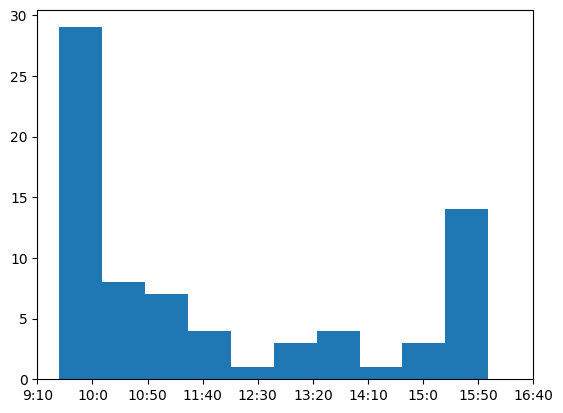

In [90]:
fig = plt.pyplot.hist(vals)
locs, labels = plt.pyplot.xticks()
for x in labels:
    x.set_text(f"{round(x.get_position()[0]) // 60}:{round(x.get_position()[0]) % 60}")
plt.pyplot.xticks(locs,labels)